<a href="https://colab.research.google.com/github/kuldeep27396/ANZ-Data-Analyst-Internship/blob/master/data8_task4_EDA_and_Viz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Summary Documentation

1. Importing all required packages
2. Reading csv file
3. Checking the row count and column count
4. Checking the info of dataframe

*We will get to know about the datatyes of each column that we will be converting to our requirement accordingly in below codes*

5. Removing extra characters from raised column

*We have to remove all sign so that we can use numbers for analysis*


6. Converted raised to numeric
7. Getting the boxplot to check the variance and outliers
8. Converting range of employees to numeric
9. Checking the Null values, here white part represents the NULL

*We do not have to remove null values here because they are very less and most of the column are having the values.*


10. Checking Raised vs employees

*In the below graph you can see that company having employee 501-100 have raised most capital.*


11. Getting a heatmap to get the correlation
12. Plotted names of startups in descending order of raised capital

*Pinterest and Lendup have raised good amount of capital.*

13. Locations where more number of startups are there (Top 10).

*San francisco has highest number of startups and NY is second highest.*




# 1. Importing all required packages

In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 
sns.set(color_codes=True)

# 2. Reading csv file

In [3]:
#you have to update this raw data github link each time you run, token changes for private repos everytime
df = pd.read_csv('https://raw.githubusercontent.com/OmdenaAI/omdena-pennsylvania-startup/main/src/tasks/task-1-data-collection/filtered_USA_angel_list.csv?token=AOXQDBSSZXPFSDNIVJXDQTLA5SCRS', index_col = 0)
df.head(10)

,name,desc,website,location,employees,raised,angel_url,angel_id
1,Cleargraph,Zero-friction identity verification,https://angel.co/cleargraphinc,San Francisco,1-10,-,https://cleargraph.com/careers.html,3405248
3,Kylie.ai,Kylie Leverages AI to Clone Enterprise Support...,https://angel.co/kylieai,San Francisco,1-10,-,http://www.kylie.ai,3399236
5,IFTTT,Do more with the services you love,https://angel.co/ifttt,San Francisco,11-50,"$37,000,000",https://ifttt.com,26564
8,CrowdFlower,The essential human-in-the-loop platform for d...,https://angel.co/crowdflower,San Francisco,51-200,"$38,000,000",http://www.crowdflower.com,32119
9,Ripple,"Instant, certain, low-cost cross-border payments.",https://angel.co/ripple-labs,San Francisco,51-200,"$86,500,000",http://www.ripple.com,197974
10,Pinterest,"Discover recipes, home ideas, style inspiratio...",https://angel.co/pinterest,San Francisco,501-1000,"$1,448,500,000",http://www.pinterest.com,281
12,Pomello,Data-Driven HR Platform,https://angel.co/pomello,San Francisco,1-10,"$28,000",http://www.pomello.com,646148
14,Revfluence,Scalable Content Powered by Influencers,https://angel.co/revfluence,San Francisco,11-50,"$2,400,000",http://www.revfluence.com/?utm_source=angellist,517211
16,Binti,Helping children join loving families,https://angel.co/binti,San Francisco,1-10,-,https://binti.com,355421
17,Mux,Build better video: Stream and measure video o...,https://angel.co/mux,San Francisco,11-50,"$11,800,000",https://mux.com,2084485


# 3. Checking the row count and column count

In [4]:
df.shape

(681, 8)

# 4. Checking the info of dataframe
We will get to know about the datatyes of each column that we will be converting to our requirement accordingly in below codes

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 681 entries, 1 to 729
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       681 non-null    object
 1   desc       681 non-null    object
 2   website    681 non-null    object
 3   location   681 non-null    object
 4   employees  669 non-null    object
 5   raised     681 non-null    object
 6   angel_url  678 non-null    object
 7   angel_id   681 non-null    int64 
dtypes: int64(1), object(7)
memory usage: 47.9+ KB


# 5. Removing extra characters from raised column
We have to remove all sign so that we can use numbers for analysis

In [6]:
df['raised'] = df['raised'].replace({'\$':''}, regex = True)
df['raised'] = df['raised'].replace({',':''}, regex = True)
df['raised'] = df['raised'].replace({'-':''}, regex = True)
df

,name,desc,website,location,employees,raised,angel_url,angel_id
1,Cleargraph,Zero-friction identity verification,https://angel.co/cleargraphinc,San Francisco,1-10,,https://cleargraph.com/careers.html,3405248
3,Kylie.ai,Kylie Leverages AI to Clone Enterprise Support...,https://angel.co/kylieai,San Francisco,1-10,,http://www.kylie.ai,3399236
5,IFTTT,Do more with the services you love,https://angel.co/ifttt,San Francisco,11-50,37000000,https://ifttt.com,26564
8,CrowdFlower,The essential human-in-the-loop platform for d...,https://angel.co/crowdflower,San Francisco,51-200,38000000,http://www.crowdflower.com,32119
9,Ripple,"Instant, certain, low-cost cross-border payments.",https://angel.co/ripple-labs,San Francisco,51-200,86500000,http://www.ripple.com,197974
...,...,...,...,...,...,...,...,...
111,RiskIQ,RiskIQ is the leader in digital threat management,https://angel.co/riskiq,Shawnee,51-200,65500000,http://www.riskiq.com/,32396
672,RiskIQ,RiskIQ is the leader in digital threat management,https://angel.co/riskiq,Shawnee,51-200,65500000,http://www.riskiq.com/,32396
175,Variable,Professional IoT Platform,https://angel.co/variable,Chattanooga,11-50,3250000,http://www.variableinc.com,102830
332,SupplyHog,Amazon of Building Supplies. : Buy Hardware & ...,https://angel.co/supplyhog,Chattanooga,1-10,2500000,http://www.supplyhog.com,125280


# 6. Converted raised to numeric 

In [7]:
df["raised"] = pd.to_numeric(df["raised"])

# 7. Getting the boxplot to check the variance and outliers

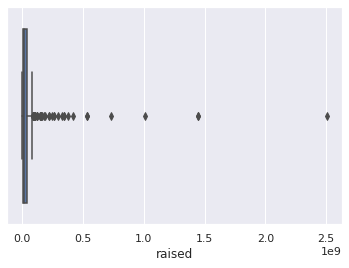

In [8]:
sns.boxplot(x=df["raised"])

# 8. Converting range of employees to numeric 

In [9]:
df.employees = df.employees.astype(str)
df['employees'] = [x.split('-')[0] for x in df['employees']]
df["employees"] = pd.to_numeric(df["employees"], errors='coerce')
df.head()

,name,desc,website,location,employees,raised,angel_url,angel_id
1,Cleargraph,Zero-friction identity verification,https://angel.co/cleargraphinc,San Francisco,1.0,NaN,https://cleargraph.com/careers.html,3405248
3,Kylie.ai,Kylie Leverages AI to Clone Enterprise Support...,https://angel.co/kylieai,San Francisco,1.0,NaN,http://www.kylie.ai,3399236
5,IFTTT,Do more with the services you love,https://angel.co/ifttt,San Francisco,11.0,37000000.0,https://ifttt.com,26564
8,CrowdFlower,The essential human-in-the-loop platform for d...,https://angel.co/crowdflower,San Francisco,51.0,38000000.0,http://www.crowdflower.com,32119
9,Ripple,"Instant, certain, low-cost cross-border payments.",https://angel.co/ripple-labs,San Francisco,51.0,86500000.0,http://www.ripple.com,197974


# 9. Checking the Null values, here white part represents the NULL

We do not have to remove null values here because they are very less and most of the column are having the values.

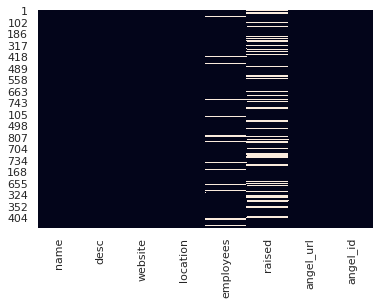

In [10]:
sns.heatmap(df.isnull(), cbar=False)

# 10. Checking Raised vs employees

In the below graph you can see that company having employee 501-100 have raised most capital.

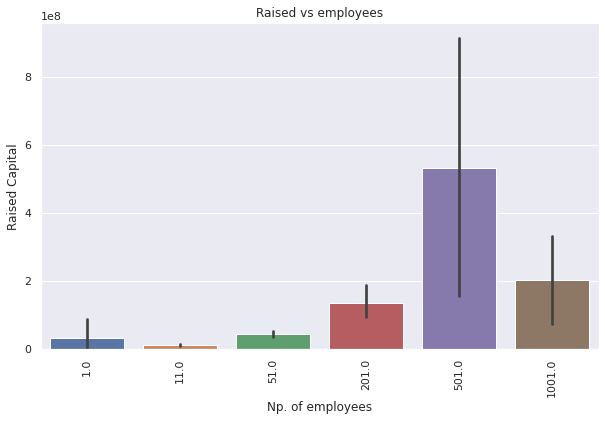

In [11]:
plt.figure(figsize=(10,6))
ax=sns.barplot(x=df.employees,y=df.raised)
plt.xticks(rotation=90)
plt.xlabel("Np. of employees")
plt.ylabel("Raised Capital")
plt.title("Raised vs employees")
plt.show()

# 11. Getting a heatmap to get the correlation

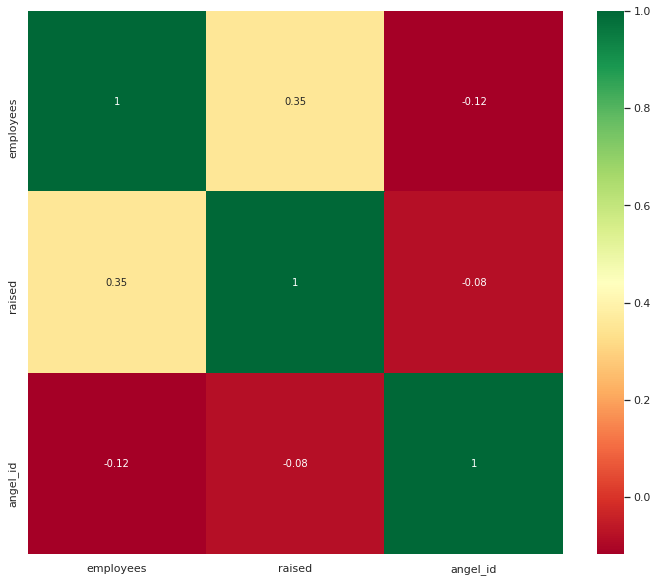

In [12]:
plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(df.corr(), annot=True,cmap ='RdYlGn')  # seaborn has very simple solution for heatmap

In [13]:
df.max()

name                                                     yozio
desc         x.ai  is a personal assistant who schedules me...
website                                https://angel.co/zumper
location                                         Washington DC
employees                                                 1001
raised                                              2.5052e+09
angel_id                                               4277247
dtype: object

# 12. Plotted names of startups in descending order of raised capital.

Pinterest and Lendup have raised good amount of capital.

In [14]:
import plotly.express as px
df.dropna(inplace =True)
fig = px.bar(df,y='raised',x='name',orientation='v',title = "Startup vs Raised Capital")
fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'})
fig.show()

# 13. Locations where more number of startups are there (Top 10).

San francisco has highest number of startups and NY is second highest.

In [19]:
df['location'].value_counts()[:10]

San Francisco    212
New York City     66
Boston            21
Palo Alto         19
Mountain View     16
Los Angeles       16
Redwood City      10
Chicago            8
San Mateo          7
Cambridge          7
Name: location, dtype: int64

In [ ]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [20]:
from pandas_profiling import ProfileReport

In [21]:
profile= ProfileReport( df, title= "filtered_USA_angel_list", html={'style' : {'full_width' : True}})

In [22]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/22 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]